# Song Popularity Prediction 

### Importing the libraries 


In [2]:
import numpy as np
import pandas as pd # for working with the dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting 
%matplotlib inline 
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")

### Loading and Viewing Dataset
We load the dataset and look at the overall statistics such as mean, count, and median 

In [3]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [4]:
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [5]:
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


### Cleaning the NULL Values 
It is important to remove all Null values 

In [6]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## Exploratory Analysis 
We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associates 

Text(0.5, 1.0, 'Popularity Distribution')

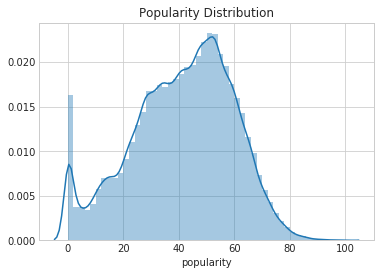

In [7]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

In [8]:
# Finding the correlation 
df.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256564     0.002348   
acousticness       -0.381295      1.000000     -0.364546     0.011203   
danceability        0.256564     -0.364546      1.000000    -0.125781   
duration_ms         0.002348      0.011203     -0.125781     1.000000   
energy              0.248922     -0.725576      0.325807    -0.030550   
instrumentalness   -0.210983      0.316154     -0.364941     0.076021   
liveness           -0.167995      0.069004     -0.041684     0.023783   
loudness            0.363011     -0.690202      0.438668    -0.047618   
speechiness        -0.151076      0.150935      0.134560    -0.016171   
tempo               0.081039     -0.238247      0.021939    -0.028456   
valence             0.060076     -0.325798      0.547154    -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.210983 -0.167995  0.363011    -0.151076   
acousticness     -0.725576          0.316154  0.069004 -0.690202     0.150935   
danceability      0.325807         -0.364941 -0.041684  0.438668     0.134560   
duration_ms      -0.030550          0.076021  0.023783 -0.047618    -0.016171   
energy            1.000000         -0.378957  0.192801  0.816088     0.145120   
instrumentalness -0.378957          1.000000 -0.134198 -0.506320    -0.177147   
liveness          0.192801         -0.134198  1.000000  0.045686     0.510147   
loudness          0.816088         -0.506320  0.045686  1.000000    -0.002273   
speechiness       0.145120         -0.177147  0.510147 -0.002273     1.000000   
tempo             0.228774         -0.104133 -0.051355  0.228364    -0.081541   
valence           0.436771         -0.307522  0.011804  0.399901     0.023842   

                     tempo   valence  
popularity        0.081039  0.060076  
acousticness     -0.238247 -0.325798  
danceability      0.021939  0.547154  
duration_ms      -0.028456 -0.141811  
energy            0.228774  0.436771  
instrumentalness -0.104133 -0.307522  
liveness         -0.051355  0.011804  
loudness          0.228364  0.399901  
speechiness      -0.081541  0.023842  
tempo             1.000000  0.134857  
valence           0.134857  1.000000

Text(0.5, 1.0, 'Popularity Based on Time Signature')

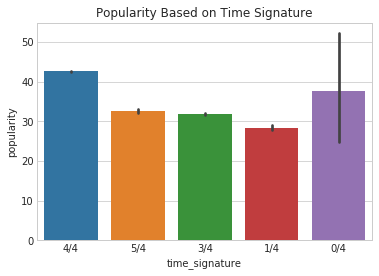

In [9]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

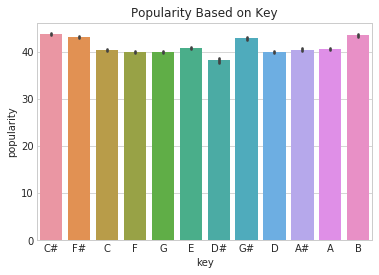

In [11]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

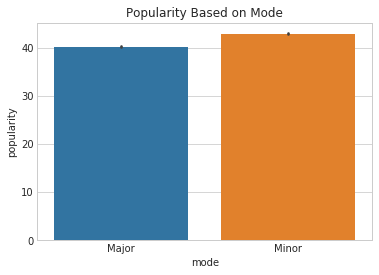

In [12]:
sns.barplot(x = 'mode', y = 'popularity', data=df)
plt.title('Popularity Based on Mode')

Since the key and moder are related, we combine those two features  in another barplot using "hue"

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

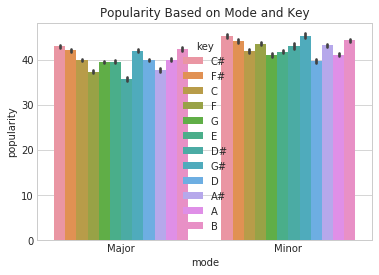

In [13]:
sns.barplot(x= 'mode', y = 'popularity', hue= 'key', data = df)
plt.title('Popularity Based on Mode and Key')

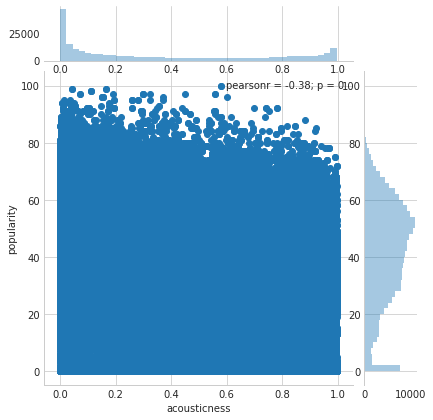

In [14]:
sns.jointplot(x='acousticness', y = 'popularity', data=df)


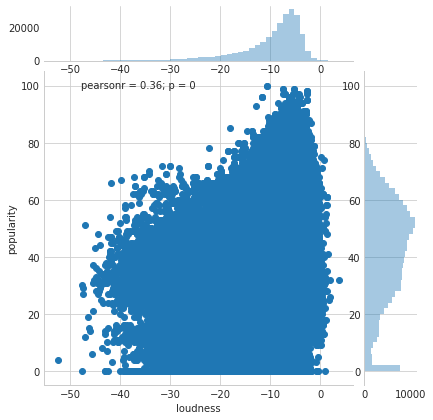

In [15]:
sns.jointplot(x='loudness', y='popularity', data=df)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 popularity')

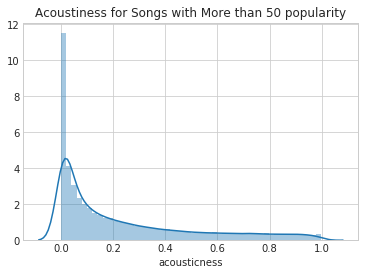

In [16]:
popular_above_50 = df[df.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with less than 50 Popularity')

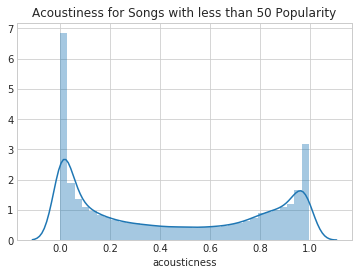

In [17]:
popular_below_50 = df[df.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

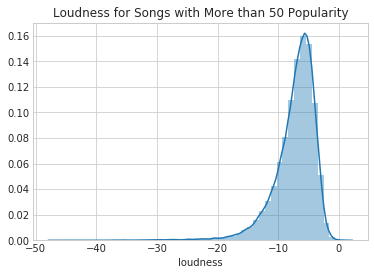

In [18]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

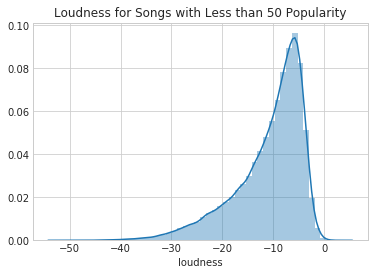

In [19]:
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

From this analysis, we can say that loudness and acousticness have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acoustiness differ for songs with more than 50 popularity vs songs with less than 50 popularity. We can plot a summary of all relationshops between features 

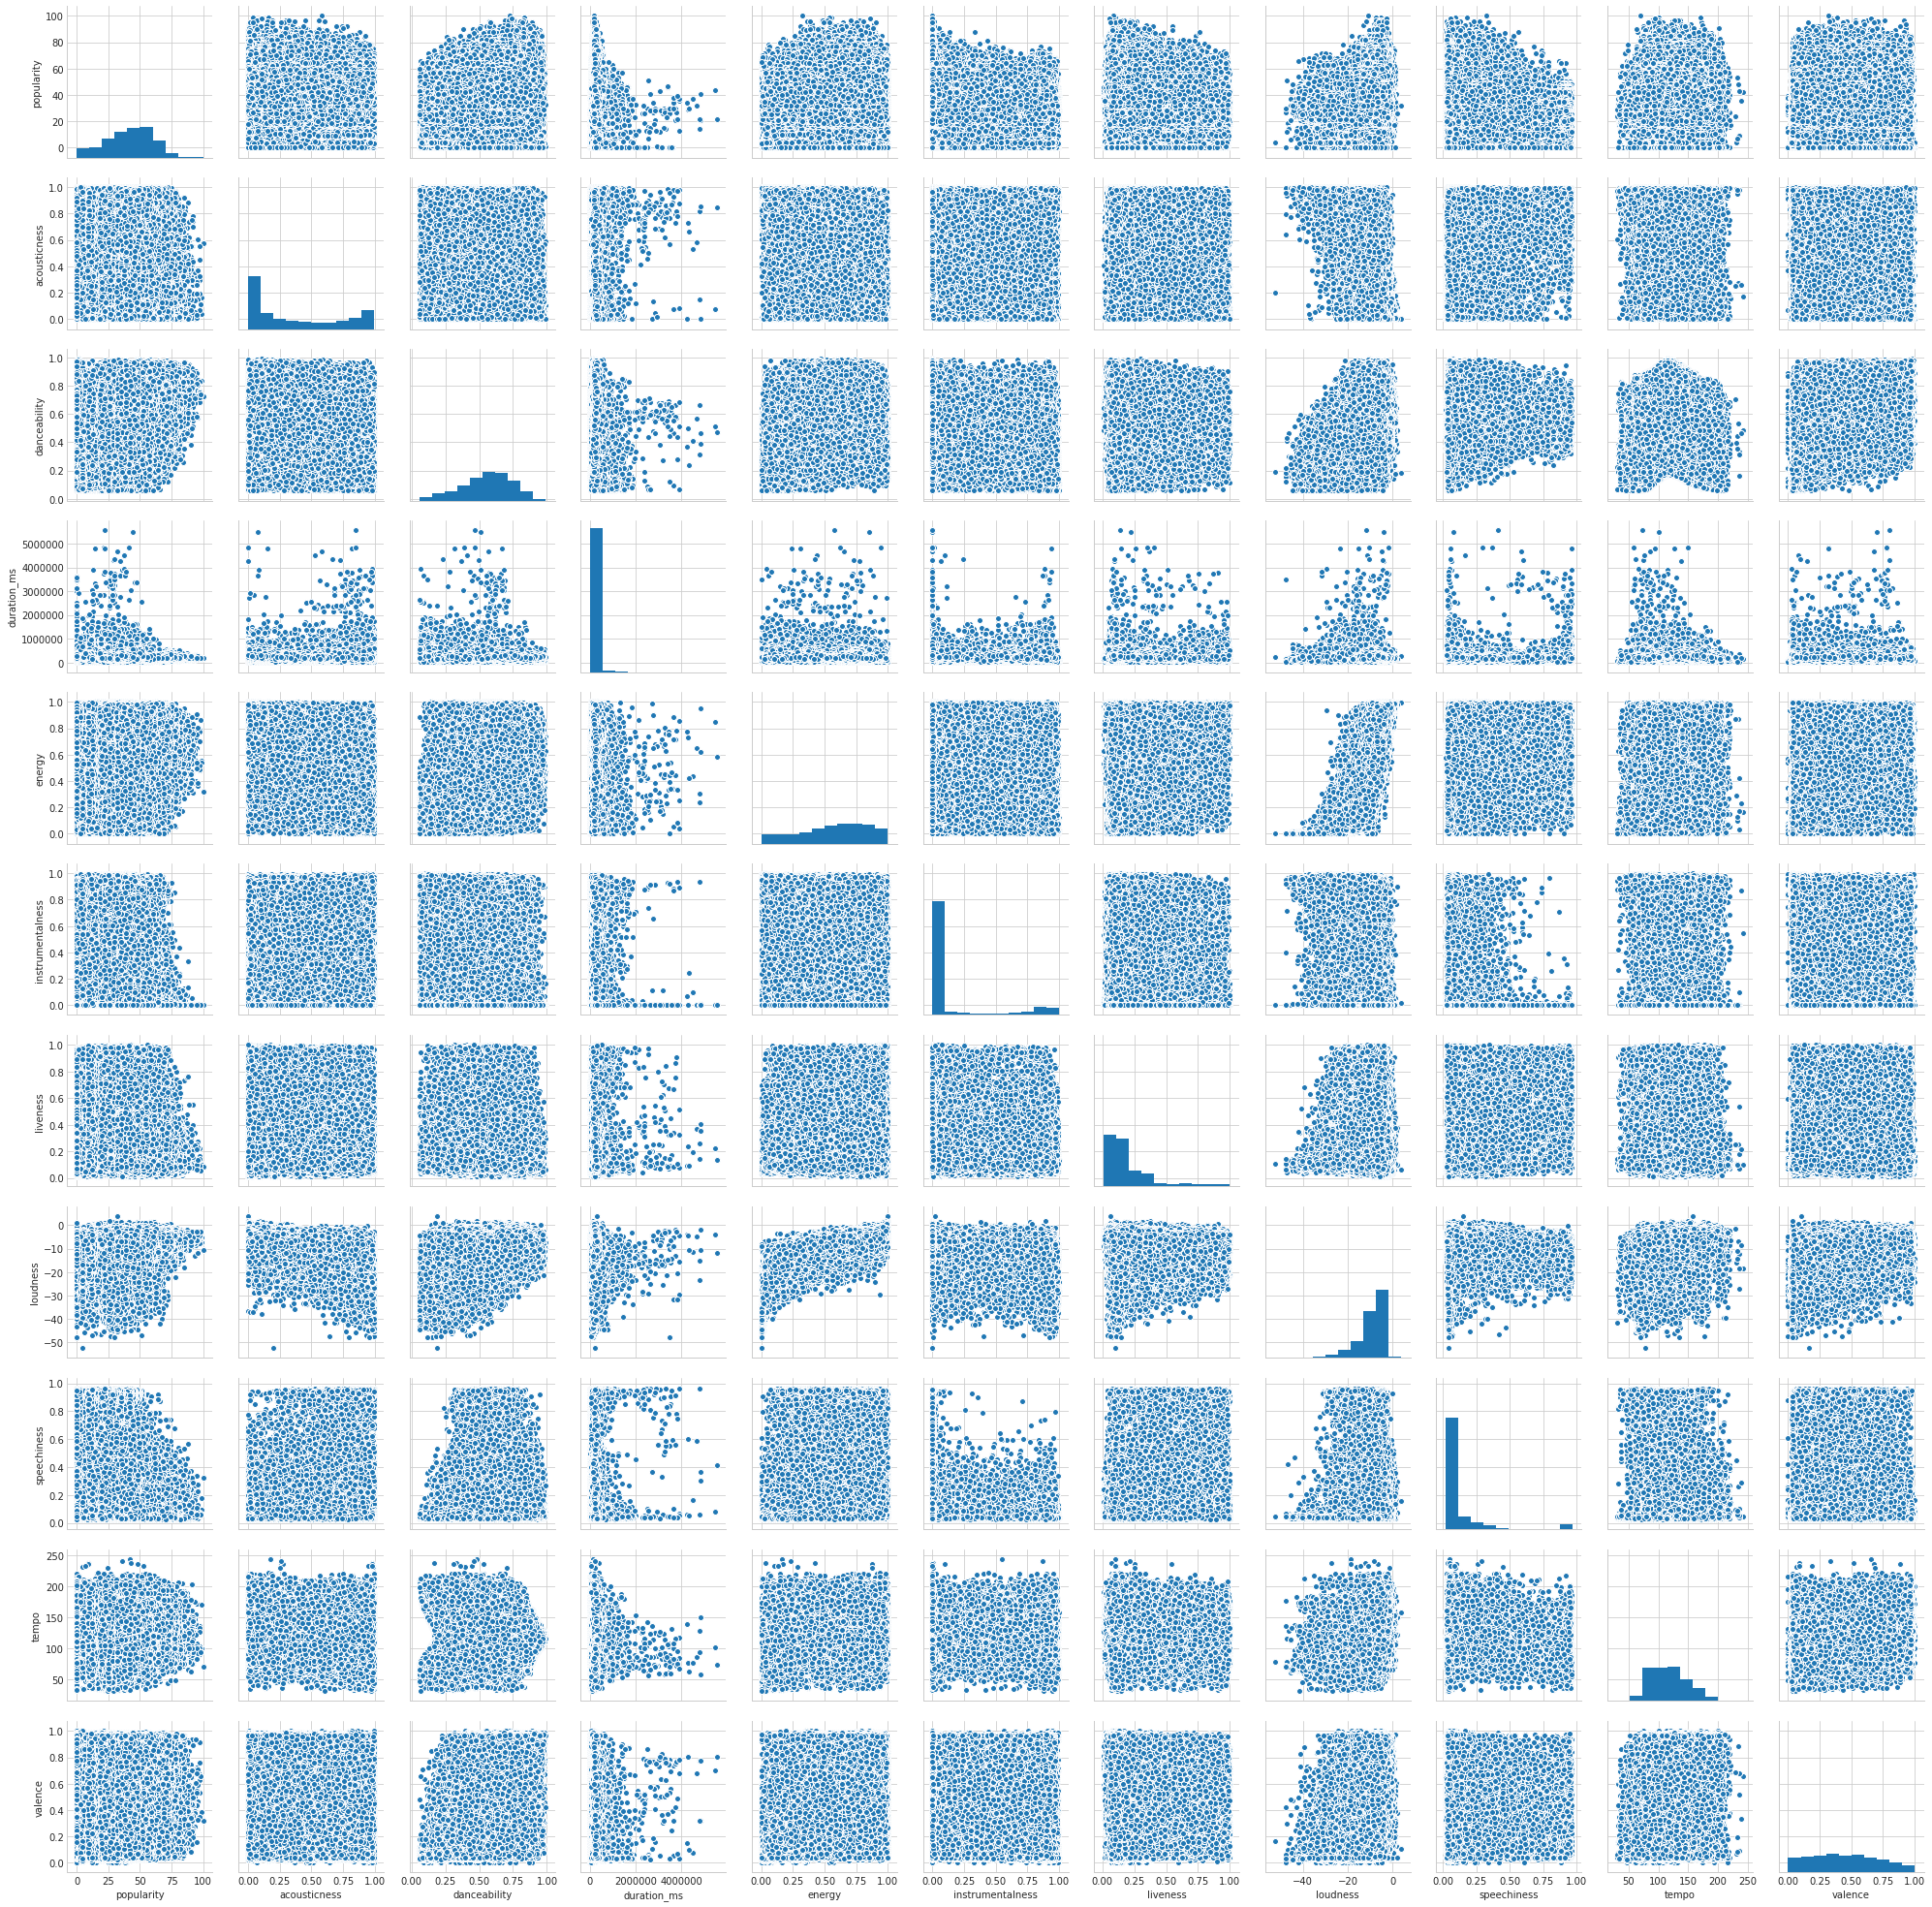

In [20]:
sns.pairplot(df)

In [21]:
len(df)

232725